In [ ]:
import pandas as pd

ds = pd.read_csv("laptop_purchase_data_india_Cleaned.csv")
ds.head()

,Customer_ID,Age,Gender,City,Income_Level,Purchase_Mode,Brand_Purchased,Minimum Price in k,Maximum Price in k,Payment_Mode,Purchase_Frequency,Satisfaction_Rating
0,CUST00001,56,Male,Pune,Low,Online,Dell,30,50,UPI,Rare,4
1,CUST00002,46,Female,Kolkata,Medium,Online,MSI,30,74,Cash,Occasional,2
2,CUST00003,32,Male,Bangalore,Low,Online,Samsung,80,120,UPI,Occasional,3
3,CUST00004,25,Female,Jaipur,Medium,Offline,Samsung,30,74,Credit Card,Rare,4
4,CUST00005,38,Female,Pune,High,Online,MSI,80,120,Cash,Rare,3


**Its already a Cleaned Data by Excel and Power Query**

**So we can just check for any missing values**

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          5000 non-null   object
 1   Age                  5000 non-null   int64 
 2   Gender               5000 non-null   object
 3   City                 5000 non-null   object
 4   Income_Level         5000 non-null   object
 5   Purchase_Mode        5000 non-null   object
 6   Brand_Purchased      5000 non-null   object
 7   Minimum Price in k   5000 non-null   int64 
 8   Maximum Price in k   5000 non-null   int64 
 9   Payment_Mode         5000 non-null   object
 10  Purchase_Frequency   5000 non-null   object
 11  Satisfaction_Rating  5000 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 468.9+ KB


In [ ]:
ds.isna().sum()

,0
Customer_ID,0
Age,0
Gender,0
City,0
Income_Level,0
Purchase_Mode,0
Brand_Purchased,0
Minimum Price in k,0
Maximum Price in k,0
Payment_Mode,0


**We can see there is no empty cells**

# **Data Profiling**

In [ ]:
!pip install -U ydata-profiling

In [58]:
import ydata_profiling

ydata_profiling.ProfileReport(ds)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Univariate analysis**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

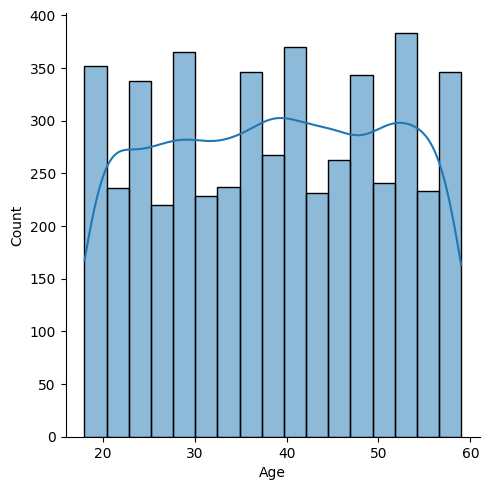

In [50]:
sns.displot(ds['Age'],kde=True)

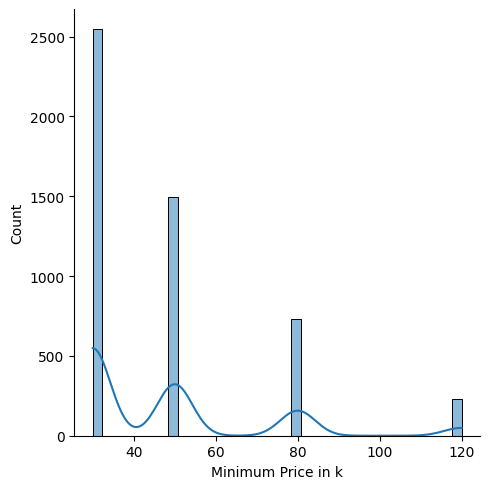

In [ ]:
sns.displot(ds['Minimum Price in k'],kde=True)

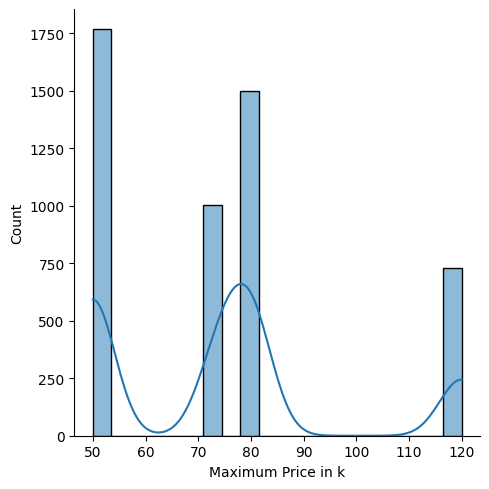

In [ ]:
sns.displot(ds['Maximum Price in k'],kde=True)

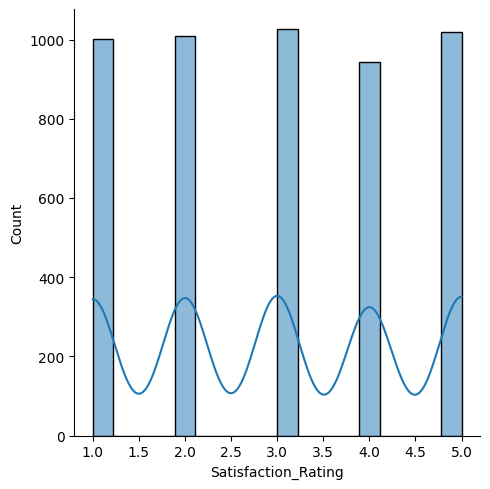

In [ ]:
sns.displot(ds['Satisfaction_Rating'],kde=True)

# **Distribution on Catagorical data**

<Axes: xlabel='count', ylabel='Gender'>

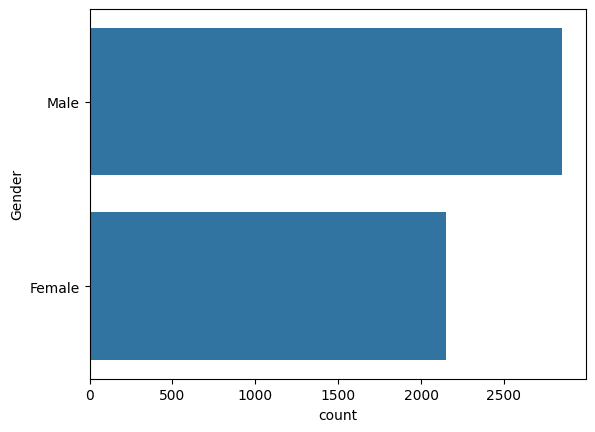

In [ ]:
sns.countplot(ds['Gender'])

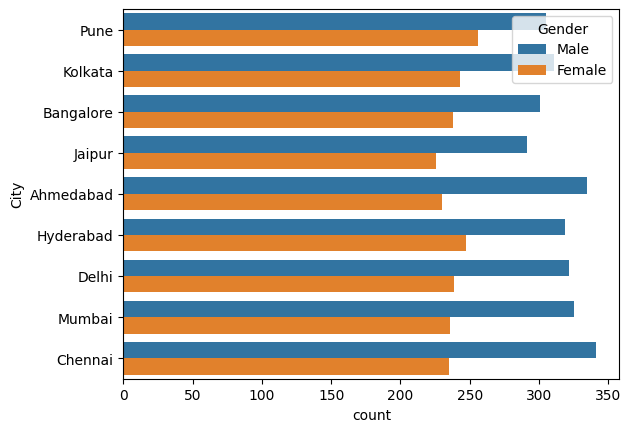

In [41]:
sns.countplot(ds,y='City',hue='Gender')
plt.show()

In [42]:
ds.head()

,Customer_ID,Age,Gender,City,Income_Level,Purchase_Mode,Brand_Purchased,Minimum Price in k,Maximum Price in k,Payment_Mode,Purchase_Frequency,Satisfaction_Rating
0,CUST00001,56,Male,Pune,Low,Online,Dell,30,50,UPI,Rare,4
1,CUST00002,46,Female,Kolkata,Medium,Online,MSI,30,74,Cash,Occasional,2
2,CUST00003,32,Male,Bangalore,Low,Online,Samsung,80,120,UPI,Occasional,3
3,CUST00004,25,Female,Jaipur,Medium,Offline,Samsung,30,74,Credit Card,Rare,4
4,CUST00005,38,Female,Pune,High,Online,MSI,80,120,Cash,Rare,3


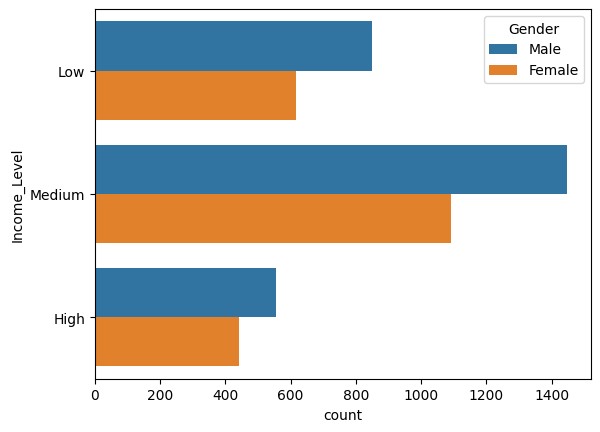

In [43]:
sns.countplot(ds,y='Income_Level',hue='Gender')
plt.show()

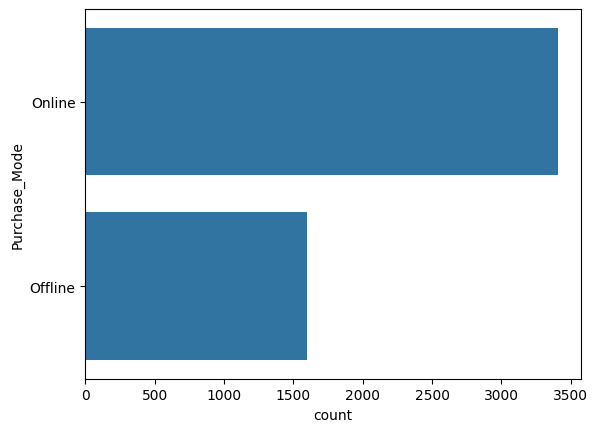

In [44]:
sns.countplot(ds,y='Purchase_Mode')
plt.show()

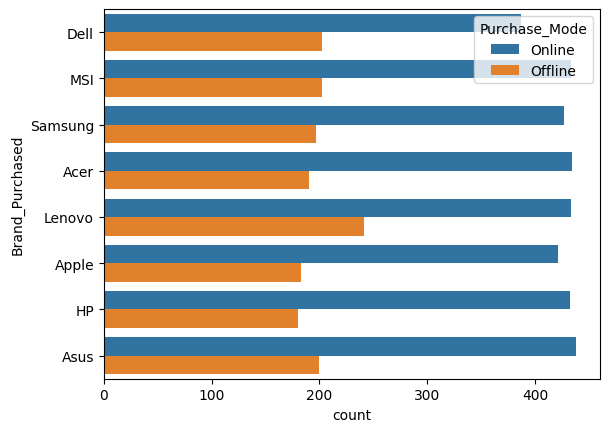

In [45]:
sns.countplot(ds,y='Brand_Purchased',hue='Purchase_Mode')
plt.show()

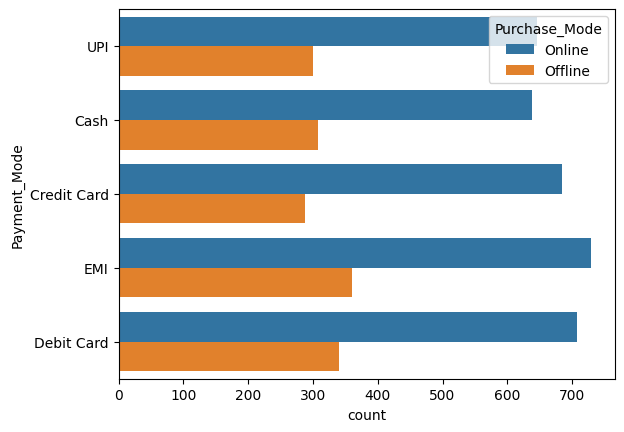

In [46]:
sns.countplot(ds,y='Payment_Mode',hue='Purchase_Mode')
plt.show()

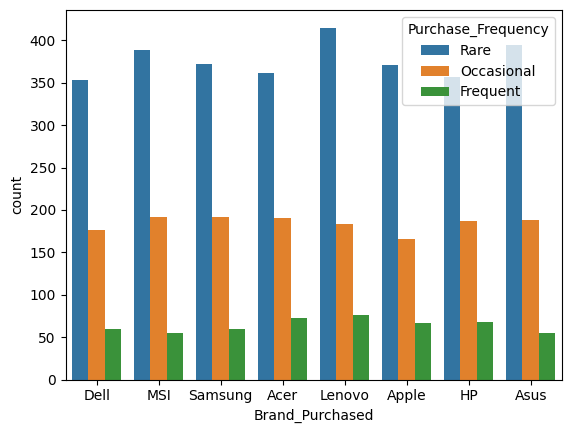

In [47]:
sns.countplot(ds,x='Brand_Purchased',hue='Purchase_Frequency')
plt.show()

# **Bivariate Analysis**

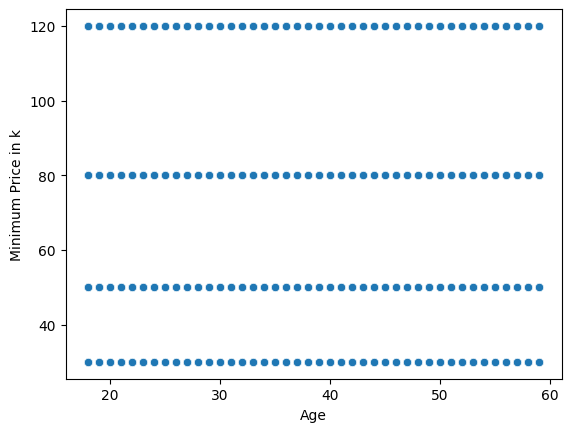

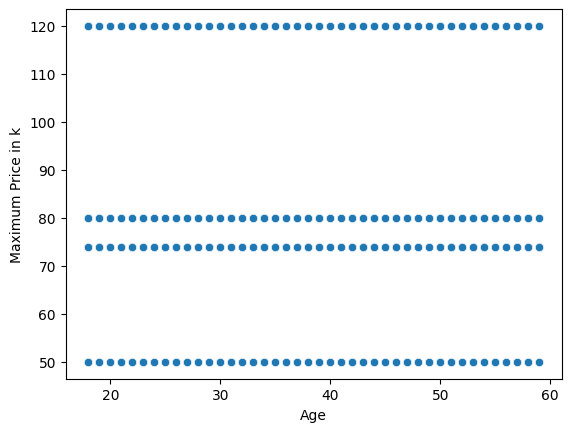

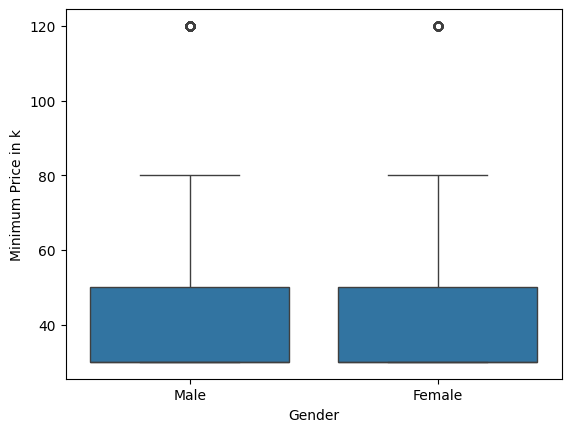

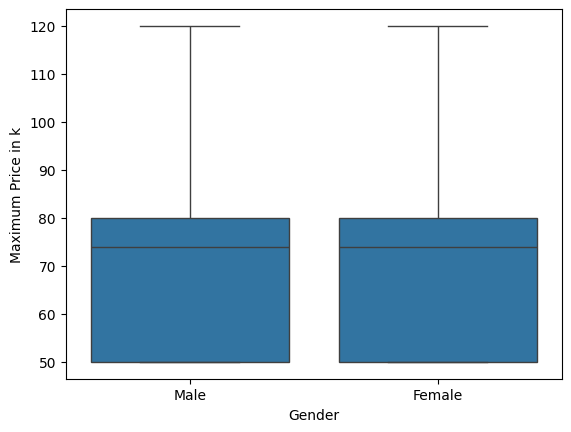

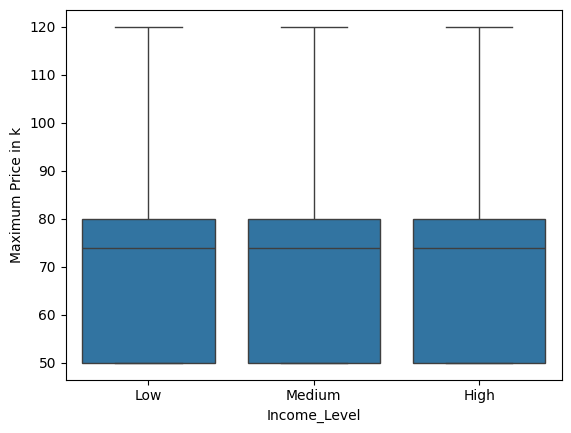

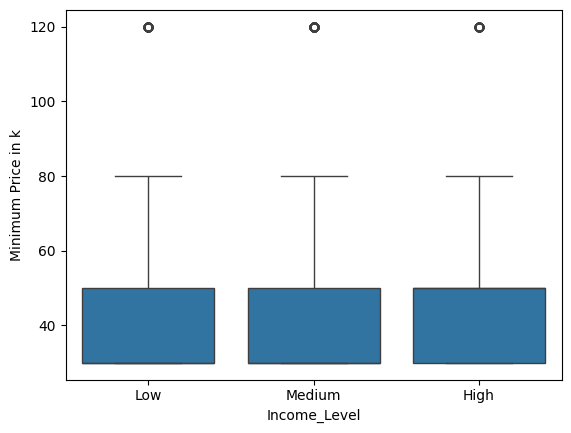

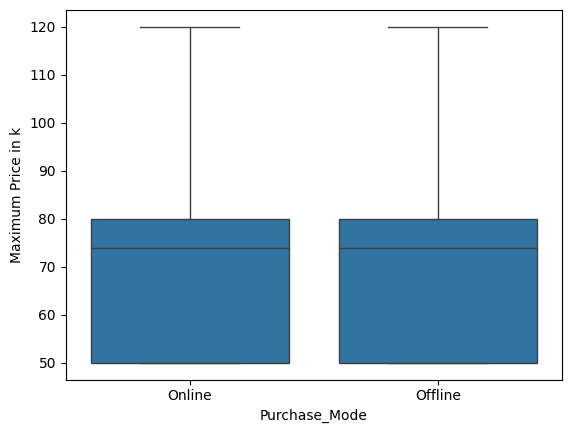

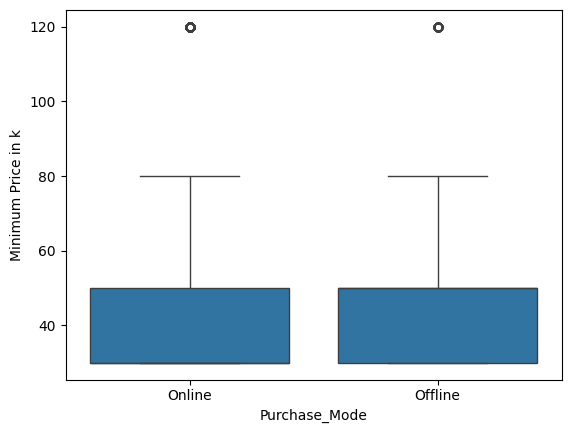

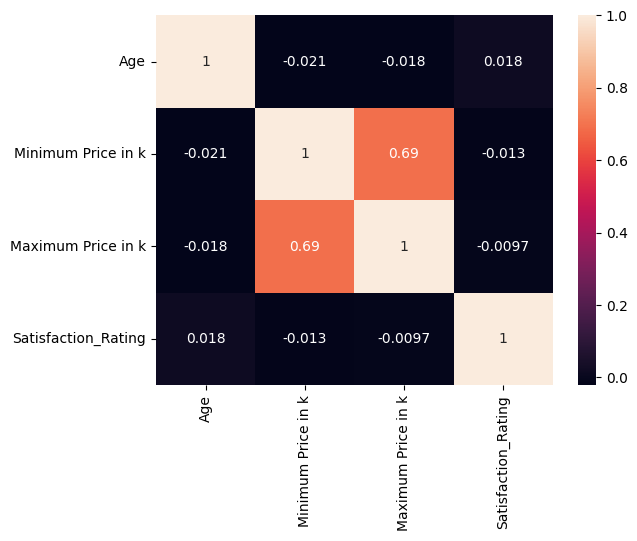

In [48]:
# Bivariate Analysis
sns.scatterplot(x='Age',y='Minimum Price in k',data=ds)
plt.show()
sns.scatterplot(x='Age',y='Maximum Price in k',data=ds)
plt.show()
sns.boxplot(x='Gender',y='Minimum Price in k',data=ds)
plt.show()
sns.boxplot(x='Gender',y='Maximum Price in k',data=ds)
plt.show()
sns.boxplot(x='Income_Level',y='Maximum Price in k',data=ds)
plt.show()
sns.boxplot(x='Income_Level',y='Minimum Price in k',data=ds)
plt.show()
sns.boxplot(x='Purchase_Mode',y='Maximum Price in k',data=ds)
plt.show()
sns.boxplot(x='Purchase_Mode',y='Minimum Price in k',data=ds)
plt.show()
numerical_ds = ds.select_dtypes(include=['number'])
sns.heatmap(numerical_ds.corr(),annot=True)
plt.show()

# **Multivariate Analysis**

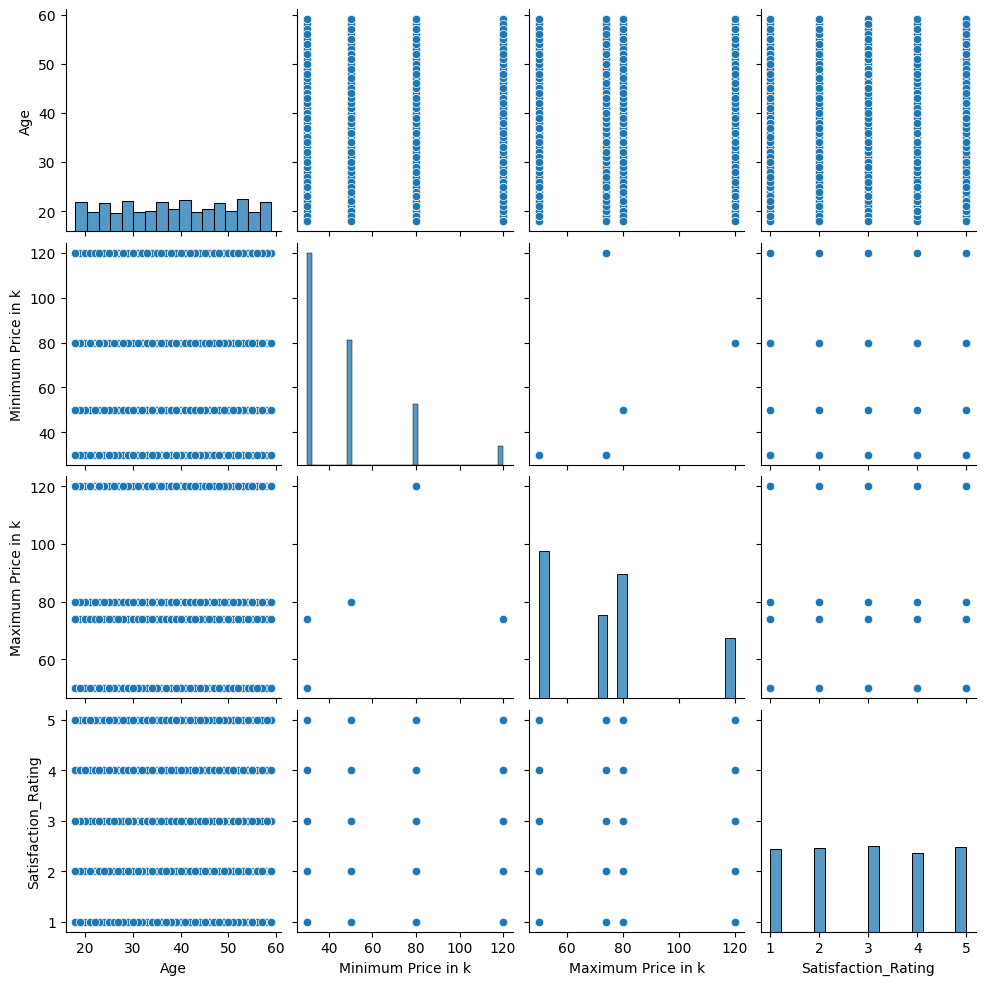

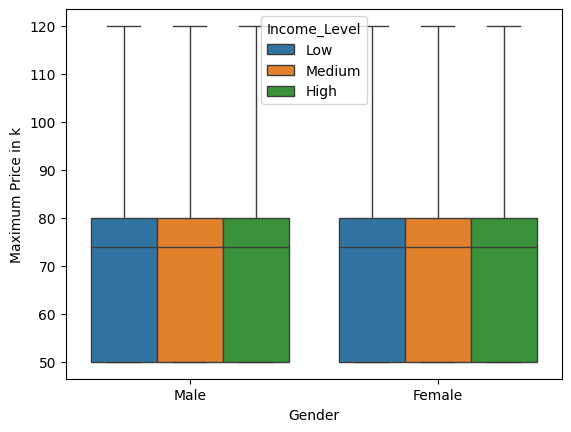

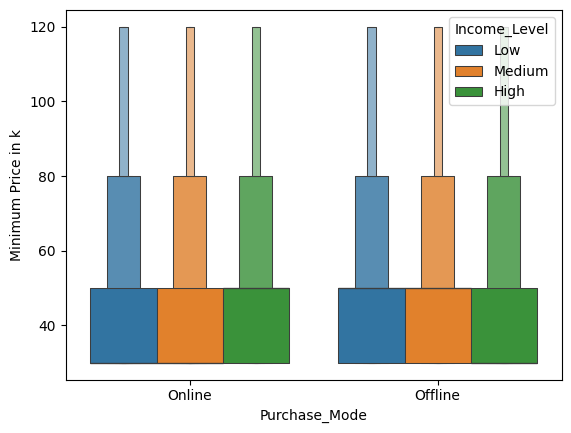

Income_Level       High        Low     Medium
Gender                                       
Female        73.475113  74.626623  74.573260
Male          74.194946  73.431604  73.781768


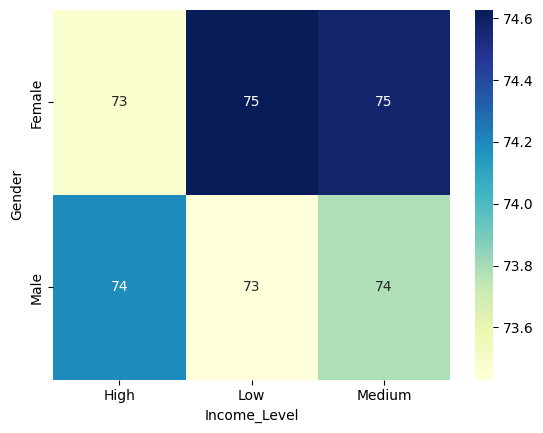

In [49]:
# Multivariate Analysis

# Pairplot to visualize relationships between multiple numerical variables
sns.pairplot(numerical_ds)
plt.show()

# Analyze the relationship between multiple numerical and categorical variables
# Example:  Impact of Gender and Income Level on Maximum Price
sns.boxplot(x='Gender', y='Maximum Price in k', hue='Income_Level', data=ds)
plt.show()

# Another example: Impact of Purchase Mode, Income Level, and Gender on Minimum Price
sns.boxenplot(x='Purchase_Mode', y='Minimum Price in k', hue='Income_Level', data=ds)
plt.show()


# More complex multivariate analysis could include:
# - 3D scatter plots (if you have three numerical features)
# - Interaction plots
# - Analysis of Variance (ANOVA) with multiple factors

# Example using a pivot table to see the average maximum price by gender and income level
pivot_table = pd.pivot_table(ds, values='Maximum Price in k', index='Gender', columns='Income_Level', aggfunc='mean')
print(pivot_table)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu") #visualize pivot table
plt.show()

# **Corelation Function For the data**

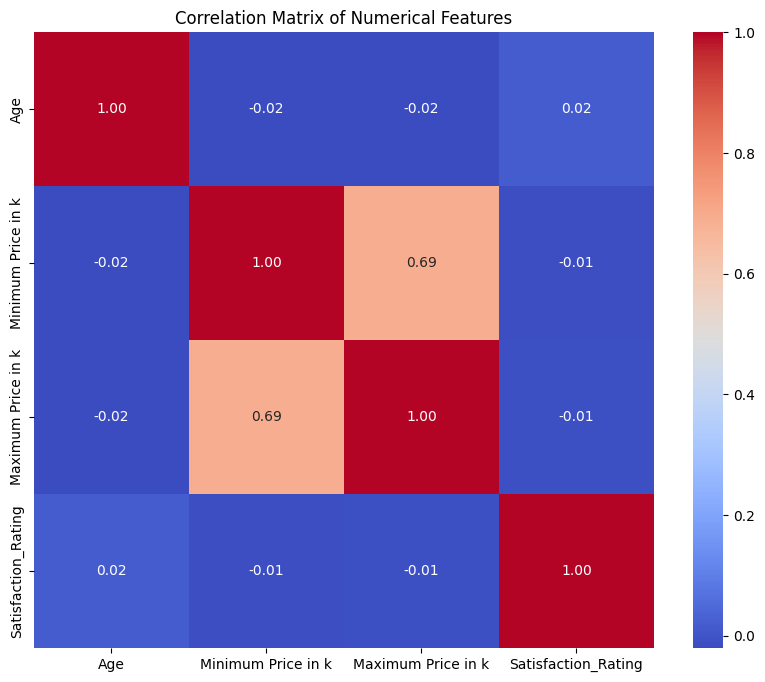

Correlation between Age and Maximum Price: -0.017618517327478954


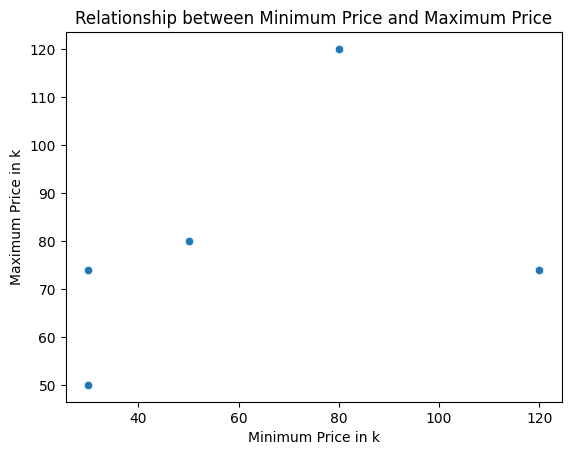


Average Satisfaction Rating by Gender:
 Gender
Female    3.003721
Male      2.987018
Name: Satisfaction_Rating, dtype: float64


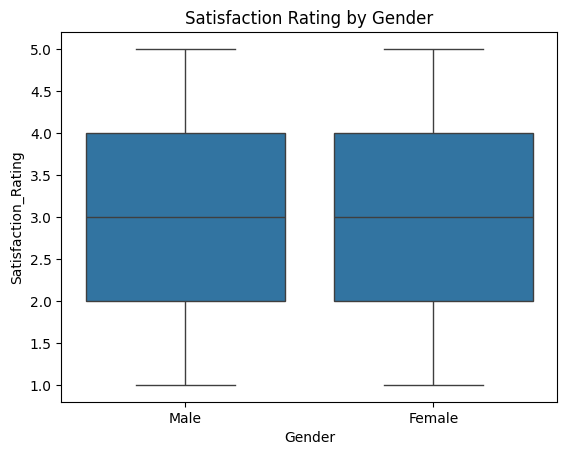

In [56]:
# Load the dataset (assuming it's in the same directory or provide the correct path)
ds = pd.read_csv("laptop_purchase_data_india_Cleaned.csv")

# Calculate the correlation matrix for numerical features
numerical_features = ds.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# Example:  Analyze the correlation between 'Age' and 'Maximum Price in k'
print(f"Correlation between Age and Maximum Price: {correlation_matrix['Age']['Maximum Price in k']}")


# Further analysis based on the correlation matrix
# Example: Analyze relationship between highly correlated features
# if 'Minimum Price in k' and 'Maximum Price in k' are highly correlated,
# investigate the relationship further using a scatter plot

sns.scatterplot(x='Minimum Price in k', y='Maximum Price in k', data=ds)
plt.title('Relationship between Minimum Price and Maximum Price')
plt.show()

# Interpret the correlations:
# - Positive correlation: As one variable increases, the other tends to increase.
# - Negative correlation: As one variable increases, the other tends to decrease.
# - Correlation close to 0: Little to no linear relationship between the variables.

# Additional analysis based on observed correlations:
# Investigate the correlation between categorical and numerical features.

# Example using groupby and mean to understand the relationship between gender and satisfaction
gender_satisfaction = ds.groupby('Gender')['Satisfaction_Rating'].mean()
print("\nAverage Satisfaction Rating by Gender:\n", gender_satisfaction)

# Visualize Gender and Satisfaction
sns.boxplot(x='Gender', y='Satisfaction_Rating', data=ds)
plt.title('Satisfaction Rating by Gender')
plt.show()

# **Regression**

Mean Squared Error: 274.11793959147946
R-squared: 0.4897893605796113


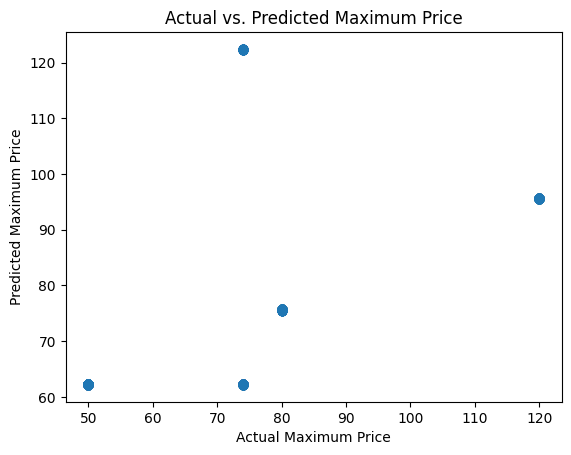

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
ds = pd.read_csv("laptop_purchase_data_india_Cleaned.csv")

# Select features (X) and target variable (y)
# Example: Predicting 'Maximum Price in k' based on 'Age' and 'Minimum Price in k'
X = ds[['Age', 'Minimum Price in k']]
y = ds['Maximum Price in k']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the results (optional)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Maximum Price")
plt.ylabel("Predicted Maximum Price")
plt.title("Actual vs. Predicted Maximum Price")
plt.show()